# Introduction #

For last few months, I read a lot about machine learning and learnt a bunch of stuff. But the main issue, is that I fell sometimes I missed the basics of deep learning, as more and more libraries abstract many parts of models. So here is the first project. Let's Build a simple neural network with just numpy. Do not use know dataset, just try to modelize a sinus function. I will also have a very naive approach, start with a very simple neural network without bias and then try to correct it.

##  Model description ##

Trying to approach the sinus function, I will only use a single layer neural network, with 4 nodes. Why ? well, it is just a guess, let's start simple and if it does not work, I will change the parameters.

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "./img/modele1.png",width=400, height=350)

First vector X will be the x injected to the sinus function. $\hat Y$ vector will be our prediction vector. Y vector will be the reference. For instance imagine our first data in X is:$sin(\frac{\pi}{2})=1$

It will give us $x_1=\frac{\pi}{2}$ and $y=1$ , if our model predict 0.9, then $\hat y_1 = 0.99$

### 1. Data creation ###
Let's introduce first a function that create n random points and their sinus:

In [2]:
import numpy as np

def randSinVector(n):
    np.random.seed(42) # to get same random values eveytimes
    x = np.empty([n,2])
    theta = 2 * np.pi * np.random.random_sample((n))
    x[:,0] = theta
    x[:,1] = np.sin(theta)  # value in radian
    return x

In [3]:
n=50

data = randSinVector(n)
X = data[:,0] # will give dimension of (n,), we need (n,1)
# see https://stackoverflow.com/questions/36412762/how-to-understand-empty-dimension-in-python-numpy-array
X = X[np.newaxis].T # X is a (n,1)  
Y = data[:,1]
Y = Y[np.newaxis].T

### 2. Neural Network building ###

Let's create the vector representing the weights of the networks:

In [4]:
#layer1_W is the weight vector from input to hidden layer
layer1_W = np.random.random((1,4))  # dim = input , number node -> (1 by 4) dimension
#layer2_W is the weight vector from layer1 to output layer
layer2_W = np.random.random((4,1)) # dim = number node , output -> (4 by 1) dimension

After each multiplication of matrix by weight, we need to activate the neuron. We will use the sigmoid function. Let's code it and also its derivate:

In [5]:
def sigmoidPrimeLite(s):
    return s*(1-s)

def sigmoid(s):
    # activation function
    return 1/(1+np.exp(-s))

Now let's compute the mode thanks to the famous backpropagation algorithm (explication below). We will run it with a full batch mode (all the sample at the time), this will provide us n predictions. We will also display the loss during the training.

In [6]:
steps = 5000
alpha = 0.45
for i in range(1,steps):
    OUTh = sigmoid(np.dot(X, layer1_W))  # out of layer1 which is a 50x4 dimension

    OUTo = sigmoid(np.dot(OUTh, layer2_W))  # prediction of the system (50x1)

    # backprog we will use the Sqare error function = Sigma(y_hat-y)^2

    # for layer2:
    dEtotal_dOUTo = -(Y-OUTo)  # dimension (50,1)
    dOUTo_dNETo = sigmoidPrimeLite(OUTo)#OUTo*(1-OUTo)  # dimension (50,1)
    #OUTh   dimension (50,4)

    dEtotal_dOUTh = np.dot(-(Y-OUTo)*sigmoidPrimeLite(OUTo),layer2_W.T)  # dimension (50,1)
    dOUTh_dNETh = sigmoidPrimeLite(OUTh)  # dimension (50,4)
    dNETh_dW = X # dimension (50,1)

    #layer2_W = layer2_W - alpha * (np.dot(dEtotal_dOUTo.T,dOUTo_dNETo*OUTh)).T ##OLD

    layer2_W = layer2_W - alpha * (np.dot((dEtotal_dOUTo*dOUTo_dNETo).T,OUTh)).T

    # for layer1:
    #layer1_W = layer1_W - alpha * (np.dot((dEtotal_dOUTh * dOUTh_dNETh).T, dNETh_dW)).T  ##OLD
    layer1_W = layer1_W - alpha * (X.T.dot(dEtotal_dOUTh*dOUTh_dNETh))
    
    if i % 100 == 0:
        OUTh = sigmoid(np.dot(X, layer1_W))  # out of layer1 which is a 50x4 dimension
        OUTo = sigmoid(np.dot(OUTh, layer2_W))

        print("steps:{0} - loss:{1}".format(i, 0.5*(np.sum(Y-OUTo))*(np.sum(Y-OUTo))))

steps:100 - loss:0.6321806432324788
steps:200 - loss:0.6321806976986557
steps:300 - loss:0.632180697699204
steps:400 - loss:0.632180697699204
steps:500 - loss:0.632180697699204
steps:600 - loss:0.632180697699204
steps:700 - loss:0.632180697699204
steps:800 - loss:0.632180697699204
steps:900 - loss:0.632180697699204
steps:1000 - loss:0.632180697699204
steps:1100 - loss:0.632180697699204
steps:1200 - loss:0.632180697699204
steps:1300 - loss:0.632180697699204
steps:1400 - loss:0.632180697699204
steps:1500 - loss:0.632180697699204
steps:1600 - loss:0.632180697699204
steps:1700 - loss:0.632180697699204
steps:1800 - loss:0.632180697699204
steps:1900 - loss:0.632180697699204
steps:2000 - loss:0.632180697699204
steps:2100 - loss:0.632180697699204
steps:2200 - loss:0.632180697699204
steps:2300 - loss:0.632180697699204
steps:2400 - loss:0.632180697699204
steps:2500 - loss:0.632180697699204
steps:2600 - loss:0.632180697699204
steps:2700 - loss:0.632180697699204
steps:2800 - loss:0.632180697699204

Loss seems stuck, which is not a good sign. Let's do some tests.

### Maths behing backpropagation ###

Using backpropagation algorithm without knowing how it works is not a problem in many times. But to perfectly understand what is happening inside a neural network here is math with much explication and calculus. Background needed is matrix multiplication, gradient (partial derivate).

#### 1 . Feeforward ####
This is a main operation at predicting a value, a class. In our case, based on a certain value $x_n$, our model will generate via a feedword procedure an estimated $\hat y_n$. How does it works? simply multiply neural network weight by is inputs, and then use an activation function.

First layer:

Basically, multiply input by matriw weight: $X.W_1$


$ X = \left[ {\begin{array}{c}
   x_1 \\ x_2 \\ x_3 \\ ... \\ x_n\\
  \end{array} } \right] $ with dimension (n x 1) and 
  $ W_1 = \left[ {\begin{array}{cccc}
   w_{11} & w_{12} & w_{13} & w_{14} \\
  \end{array} } \right] $ with dimension (1 x 4)

As right number of matrix X dimension is the same as left number of matrix W dimension ( n x 1 -- 1 x 4) . We can perform a matrix multiplication.

$$ X.W_1 = \left[ {\begin{array}{cccc}
   x_1.w_{11} & x_1.w_{12} & x_1.w_{13} & x_1.w_{14} \\ 
   x_2.w_{11} & x_2.w_{12} & x_2.w_{13} & x_2.w_{14} \\ 
   ... & ... & ... & ... \\ 
   x_n.w_{11} & x_n.w_{12} & x_n.w_{13} & x_n.w_{14} \\ 
  \end{array} } \right] = NET_{H1} $$
  
  We hence get a (n x 4) matrix dimension. Then let's apply the activation function. $ OUT_{h1} = \sigma(NET_{h1})= \sigma(X.W_1) $ . This is just taking all the matrix data calculated and pass them through the sigmoid function.
  
  $$ \sigma(X.W_1) = OUT_{H1} = \left[ {\begin{array}{cccc}
   \sigma(x_1.w_{11}) & \sigma(x_1.w_{12}) & \sigma(x_1.w_{13}) & \sigma(x_1.w_{14}) \\ 
   \sigma(x_2.w_{11}) & \sigma(x_2.w_{12}) & \sigma(x_2.w_{13}) & \sigma(x_2.w_{14}) \\ 
   ... & ... & ... & ... \\ 
   \sigma(x_n.w_{11} & \sigma(x_n.w_{12} & \sigma(x_n.w_{13} & \sigma(x_n.w_{14} \\ 
  \end{array} } \right] = \left[ {\begin{array}{cccc}
   OUT_{h11} & OUT_{h12} & OUT_{h13} & OUT_{h14} \\ 
   OUT_{h21} & OUT_{h22} & OUT_{h23} & OUT_{h24} \\ 
   ... & ... & ... & ... \\ 
   OUT_{hn1} & OUT_{hn2} & OUT_{hn3} & OUT_{hn4} \\ 
  \end{array} } \right] $$
  
  
  
  $OUT_{H1}$ is the output of our hidden layer. Its dimension is (n x 4)

  Let's now calculate the final output of our network. Principle is the same, multiply the weights by the input: $OUT_{H1}.W_{2}$ . Dimension of $W_2$ is (4 x 1).
  
  $$ OUT_{H1}.W_2 = \left[ {\begin{array}{cccc}
   OUT_{h11} & OUT_{h12} & OUT_{h13} & OUT_{h14} \\ 
   OUT_{h21} & OUT_{h22} & OUT_{h23} & OUT_{h24} \\ 
   ... & ... & ... & ... \\ 
   OUT_{hn1} & OUT_{hn2} & OUT_{hn3} & OUT_{hn4} \\ 
  \end{array} } \right] . \left[ {\begin{array}{cccc}
   w_{21} \\ w_{22} \\ w_{23} \\ w_{24} \\
  \end{array} } \right] = \left[ {\begin{array}{cccc}
   OUT_{h11}.w_{21}+OUT_{h12}.w_{22}+OUT_{h13}.w_{23}+OUT_{h14}.w_{24} \\
   OUT_{h21}.w_{21}+OUT_{h22}.w_{22}+OUT_{h23}.w_{23}+OUT_{h24}.w_{24} \\
   ...... \\
   OUT_{hn1}.w_{21}+OUT_{hn2}.w_{22}+OUT_{hn3}.w_{23}+OUT_{hn4}.w_{24} \\
  \end{array} } \right] $$
  
  
  $$ \sigma(OUT_{H1}.W_2) = OUT_{O} = 
  \left[ {\begin{array}{cccc}
   \sigma(OUT_{h11}.w_{21}+OUT_{h12}.w_{22}+OUT_{h13}.w_{23}+OUT_{h14}.w_{24}) \\
   \sigma(OUT_{h21}.w_{21}+OUT_{h22}.w_{22}+OUT_{h23}.w_{23}+OUT_{h24}.w_{24}) \\
   ..... \\
   \sigma(OUT_{h41}.w_{21}+OUT_{h42}.w_{22}+OUT_{h43}.w_{23}+OUT_{h44}.w_{24}) \\
  \end{array} } \right] = \left[ {\begin{array}{cccc}
   \hat{y_1}\\
   \hat{y_2}\\ \\
   ..... \\
   \hat{y_n}\\ \\
  \end{array} } \right] $$
  
  And this is it! For instance, for $x_2$ we get the prediction $\hat{y_2}$. As a code it looks like only 2 lines:
  
 

In [7]:
OUTh = sigmoid(np.dot(X, layer1_W))  # out of layer1 which is a 50x4 dimension

OUTo = sigmoid(np.dot(OUTh, layer2_W))

#### 2 . Backpropagation #### 
 This is the trickiest part. Many times, one can just copy-paste a part of algorithm found on internet, but I really wanted to understand the algorithm as if I need fine tuning, understand what would be impacted.
 
 What is the optimization problem? 
 
 We want a prediction to be as closed as possible à reality : $ \hat{y} \simeq y $ which can be translated as $ y - \hat{y} \simeq 0 $
 
 The optimization must be done for every input X :
 
 $ (y_1 - \hat{y_1}) +(y_2 - \hat{y_2}) +(y_3 - \hat{y_3}) + ....+(y_n - \hat{y_n}) = \sum_{i=1}^{n}(y_i-\hat{y_i}) $
  
  
  The difference $y_i-\hat{y_i}$ may be positive or negative. To normalize, we square it. And as we will derivate this equation, we place a 1/2, just for convenience for next calculus. Finally, we get:
  
 $E = \frac{1}{2}.\sum_{i=1}^{n}(Y_i-\hat{Y_i})^2 $  which is called the mean square error.
 
 
 As a reminder, we want E to be as small as possible. Our input X and output Y cannot be optimized, the only modification that can be done on our model is on the Weigth : $W_1$ ; $W_2$
 
 Let's start with the last layer $W_2$, how does a modification of $W_2$ impact E?
 
 if $\frac{\partial{E}}{\partial{W_2}}$ is negative, then E curve is decreasing, otherwise E is increasing when it is positive. If E is decreasing, then we should increase $W_2$, and reversely if E is increasing we should decrease $W_2$.
 
 
 

$\frac{\partial{E}}{\partial{W_2}} = \frac{\frac{1}{2}.\partial{\sum_{i=1}^{n}(Y_i-\hat{Y_i})^2}}{\partial{W_2}}$ would be what we need to compute, but this is not a easy task. We will hence use the chaine rule like this:

$\frac{\partial{E}}{\partial{W_2}} = \frac{\partial{E}}{\partial{OUT_{o}}}. \frac{\partial{OUT_{o}}}{\partial{NET_{h1}}} .\frac{\partial{NET_{h1}}}{\partial{W_2}}$ Here, we have 3 terms that are easier to calculate:


$\frac{\partial{E}}{\partial{OUT_{o}}}= \frac{\frac{1}{2}.\partial{(Y_i-OUT_o)^2}}{\partial{OUT_{o}}} = \frac{1}{2}.2.(Y-OUT_o).(-1) = - (Y-OUT_o) $

$\frac{\partial{OUT_{o}}}{\partial{NET_{h1}}}= \frac{\partial{\sigma(OUT_{H1}.W_2)}}{\partial{NET_{h1}}}= \frac{\partial{\frac{1}{1+\exp{-NET_O1}}}}{\partial{NET_{h1}}} = OUT_o.(1-OUT_o) $


$\frac{\partial{NET_{h1}}}{\partial{W_2}}= \frac{\partial{OUTH1.W2}}{\partial{W_2}} = OUT_{H1} $

Which will give us:

$\frac{\partial{E}}{\partial{W_2}} = - (Y-OUT_o).OUT_o.(1-OUT_o).OUT_{H1}$ <= Exp1

We will then update W2 according the following calculated above. To make sure that the step is not too big we will add a delta. So if $\frac{\partial{E}}{\partial{W_2}}$ is negative, it means that the slope of E is going down when we increase W2, so the expression is :

$W2^+ = W2 - \alpha . \frac{\partial{E}}{\partial{W_2}}$  As there is a minus in front of EXp1, we place a new minus in frint of alpha as we want W2 to increase.

We just updated our first layer of weight. How to update the first layer? Same principle. How does W1 affect E?


$\frac{\partial{E}}{\partial{W_1}} = \frac{\partial{E}}{\partial{OUT_{H1}}}. \frac{\partial{OUT_{H1}}}{\partial{NET_{h1}}} .\frac{\partial{NET_{h1}}}{\partial{W_1}}$  WE need to use chaine rule again to calculate the first term:

$ \frac{\partial{E}}{\partial{OUT_{H1}}} = \frac{\partial{E}}{\partial{NET_{O1}}}.\frac{\partial{NET_{O1}}}{\partial{OUT_{H1}}}$

$\frac{\partial{E}}{\partial{NET_{01}}} = \frac{\partial{E}}{\partial{OUT_{O1}}} . \frac{\partial{OUT_{O1}}}{\partial{NET_{01}}} = - (Y-OUT_o) . OUT_o.(1-OUT_o)$

$\frac{\partial{NET_{O1}}}{\partial{OUT_{H1}}} = \frac{\partial{(W_5.OUT_{H1}+...)}}{\partial{OUT_{H1}}}=W5 $

$\frac{\partial{OUT_{H1}}}{\partial{NET_{h1}}} = \frac{\partial{\sigma(X.W_1)}}{\partial{NET_{h1}}}= \frac{\partial{\frac{1}{1+\exp{-NET_{h1}}}}}{\partial{NET_{h1}}} = NET_{h1}.(1-NET_{h1}) $

$ \frac{\partial{NET_{h1}}}{\partial{W_1}} = \frac{\partial{(W_1.NET_{h1}+...)}}{\partial{W_1}}=X $

Finally:

$\frac{\partial{E}}{\partial{W_1}} = - (Y-OUT_o) . OUT_o.(1-OUT_o) . W5 . NET_{h1}.(1-NET_{h1}) . X$


### 4. Test the model ###

Let's generate a size 3 vector with some values and compare it to the model prediction.

In [8]:
X_test = np.array([(np.pi/2),(np.pi/6),0.77])

X_test = X_test[np.newaxis]
output1 = sigmoid(np.dot(X_test.T,layer1_W))  

test_prediction = sigmoid(np.dot(output1,layer2_W))

print(test_prediction)

print("result should be"+str(np.sin(2 * np.pi*X_test)))

[[0.17202415]
 [0.21387665]
 [0.20296691]]
result should be[[-0.43030122 -0.14773276 -0.9921147 ]]


#### BOUM!#### 
Not good at all. Let's try improve the model.

### 5. Investigate the problem ###

Let's try to display data and prediction on a graph.

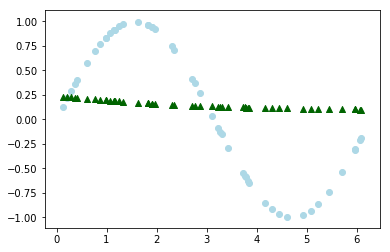

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

fig =plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X,Y,color='lightblue',marker='o')
ax.scatter(X,  OUTo,
               color='darkgreen',
               marker='^')
plt.show()

hum, confirmed this is horrible...

Let's focus on the network. What we want is basically a prediction of sinus function as output. Sinus value are between -1 and 1. The first obvious mistake is that with our ouput layer we are applying an activation function Sigmoid. Sigmoid domain is from 0 to 1, meaning that negative value will never show up ! What we can try is to use the tanh activation function which has domain from -1 to 1:

In [10]:
def tanh(x):
    return np.tanh(x)

def dtanh(y):
    return 1 - y*y

In [11]:
steps = 5000
alpha = 0.05
for i in range(1,steps):
    OUTh = tanh(np.dot(X, layer1_W))  # out of layer1 which is a 50x4 dimension

    OUTo = tanh(np.dot(OUTh, layer2_W))  # prediction of the system (50x1)

    # backprog we will use the Sqare error function = Sigma(y_hat-y)^2

    # for layer2:
    dEtotal_dOUTo = -(Y-OUTo)  # dimension (50,1)
    dOUTo_dNETo = dtanh(OUTo)#OUTo*(1-OUTo)  # dimension (50,1)
    #OUTh   dimension (50,4)

    dEtotal_dOUTh = np.dot(-(Y-OUTo)*dtanh(OUTo),layer2_W.T)  # dimension (50,1)
    dOUTh_dNETh = dtanh(OUTh)  # dimension (50,4)
    dNETh_dW = X # dimension (50,1)

    #layer2_W = layer2_W - alpha * (np.dot(dEtotal_dOUTo.T,dOUTo_dNETo*OUTh)).T ##OLD

    layer2_W = layer2_W - alpha * (np.dot((dEtotal_dOUTo*dOUTo_dNETo).T,OUTh)).T

    # for layer1:
    #layer1_W = layer1_W - alpha * (np.dot((dEtotal_dOUTh * dOUTh_dNETh).T, dNETh_dW)).T  ##OLD
    layer1_W = layer1_W - alpha * (X.T.dot(dEtotal_dOUTh*dOUTh_dNETh))
    
    if i % 100 == 0:
        OUTh = tanh(np.dot(X, layer1_W))  # out of layer1 which is a 50x4 dimension
        OUTo = tanh(np.dot(OUTh, layer2_W))

        print("steps:{0} - loss:{1}".format(i, 0.5*(np.sum(Y-OUTo))*(np.sum(Y-OUTo))))

steps:100 - loss:772.7072285282873
steps:200 - loss:879.2478962050275
steps:300 - loss:488.34552890963573
steps:400 - loss:927.0465810691587
steps:500 - loss:924.9772651326291
steps:600 - loss:881.4360058370088
steps:700 - loss:929.2303908179531
steps:800 - loss:921.7693639879035
steps:900 - loss:1297.3600725540166
steps:1000 - loss:27.447467757745358
steps:1100 - loss:915.6325378989238
steps:1200 - loss:909.6386632695841
steps:1300 - loss:912.140571788562
steps:1400 - loss:875.2358776390239
steps:1500 - loss:820.2439595776176
steps:1600 - loss:924.7495429462308
steps:1700 - loss:1381.5394617468432
steps:1800 - loss:735.6299706010606
steps:1900 - loss:917.7771425360946
steps:2000 - loss:932.9072890339606
steps:2100 - loss:809.4926544666039
steps:2200 - loss:924.4487160882597
steps:2300 - loss:931.0540556837909
steps:2400 - loss:897.4537096189678
steps:2500 - loss:926.180352602585
steps:2600 - loss:1040.9921527541655
steps:2700 - loss:911.0097644817422
steps:2800 - loss:917.801151667878

pffff . No improve, seems that the model is not complex enough. Add some more neurons in the hidden layer.

In [12]:
#layer1_W is the weight vector from input to hidden layer
layer1_W = np.random.random((1,8))  # dim = input , number node -> (1 by 8) dimension
#layer2_W is the weight vector from layer1 to output layer
layer2_W = np.random.random((8,1)) # dim = number node , output -> (4 by 8) dimension


In [13]:
steps = 5000
alpha = 0.05

for i in range(1,steps):
    #for (Xb, Yb) in next_batch(X, Y):
        OUTh = tanh(np.dot(X, layer1_W))  # out of layer1 which is a 50x4 dimension

        OUTo = tanh(np.dot(OUTh, layer2_W))  # prediction of the system (50x1)

        # backprog we will use the Sqare error function = Sigma(y_hat-y)^2

        # for layer2:
        dEtotal_dOUTo = -(Y-OUTo)  # dimension (50,1)
        dOUTo_dNETo = dtanh(OUTo)#OUTo*(1-OUTo)  # dimension (50,1)
        #OUTh   dimension (50,4)

        dEtotal_dOUTh = np.dot(-(Y-OUTo)*dtanh(OUTo),layer2_W.T)  # dimension (50,1)
        dOUTh_dNETh = dtanh(OUTh)  # dimension (50,4)
        dNETh_dW = X # dimension (50,1)

        #layer2_W = layer2_W - alpha * (np.dot(dEtotal_dOUTo.T,dOUTo_dNETo*OUTh)).T ##OLD

        layer2_W = layer2_W - alpha * (np.dot((dEtotal_dOUTo*dOUTo_dNETo).T,OUTh)).T

        # for layer1:
        #layer1_W = layer1_W - alpha * (np.dot((dEtotal_dOUTh * dOUTh_dNETh).T, dNETh_dW)).T  ##OLD
        layer1_W = layer1_W - alpha * (X.T.dot(dEtotal_dOUTh*dOUTh_dNETh))

        if i % 100 == 0:
            OUTh = tanh(np.dot(X, layer1_W))  # out of layer1 which is a 50x4 dimension
            OUTo = tanh(np.dot(OUTh, layer2_W))

            print("steps:{0} - loss:{1}".format(i, 0.5*(np.sum(Y-OUTo))*(np.sum(Y-OUTo))))
        OUTh = tanh(np.dot(X, layer1_W))  # out of layer1 which is a 50x4 dimension
        OUTo = tanh(np.dot(OUTh, layer2_W))

steps:100 - loss:932.1828637091047
steps:200 - loss:912.2550382409053
steps:300 - loss:899.6415314294369
steps:400 - loss:768.6053479514875
steps:500 - loss:844.5366232246242
steps:600 - loss:1583.17476907526
steps:700 - loss:935.9494413618061
steps:800 - loss:945.0812675421755
steps:900 - loss:921.0378904719922
steps:1000 - loss:908.9924045635471
steps:1100 - loss:935.3042400048673
steps:1200 - loss:1489.056762045091
steps:1300 - loss:902.5133970036619
steps:1400 - loss:903.7115439962251
steps:1500 - loss:454.43237201091375
steps:1600 - loss:922.9179356227324
steps:1700 - loss:942.9717857762267
steps:1800 - loss:878.0895917475058
steps:1900 - loss:1453.8436125059645
steps:2000 - loss:919.9557823838653
steps:2100 - loss:872.5196517080215
steps:2200 - loss:1397.518614266492
steps:2300 - loss:845.621690323645
steps:2400 - loss:782.5011920378134
steps:2500 - loss:896.5041469566077
steps:2600 - loss:839.7184326456381
steps:2700 - loss:924.488108622547
steps:2800 - loss:1589.8413024099211
s

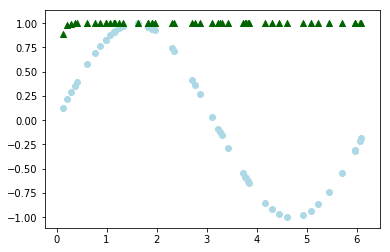

In [14]:
fig =plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X,Y,color='lightblue',marker='o')
ax.scatter(X,  OUTo,
               color='darkgreen',
               marker='^')
plt.show()

Still bad. Whether the model needs more complexity, or the gradient does not converge fast enough. let's try to train with a batch of only 10 samples.

In [15]:
def next_batch(X, Y):
    for i in np.arange(0, X.shape[0], batchSize):
        yield (X[i:i + batchSize], Y[i:i + batchSize])
batchSize = 10

In [16]:
for i in range(1,steps):
    for (Xb, Yb) in next_batch(X, Y):
        OUTh = tanh(np.dot(Xb, layer1_W))  # out of layer1 which is a 50x4 dimension

        OUTo = tanh(np.dot(OUTh, layer2_W))  # prediction of the system (50x1)

        # backprog we will use the Sqare error function = Sigma(y_hat-y)^2

        # for layer2:
        dEtotal_dOUTo = -(Yb-OUTo)  # dimension (50,1)
        dOUTo_dNETo = dtanh(OUTo)#OUTo*(1-OUTo)  # dimension (50,1)
        #OUTh   dimension (50,4)

        dEtotal_dOUTh = np.dot(-(Yb-OUTo)*dtanh(OUTo),layer2_W.T)  # dimension (50,1)
        dOUTh_dNETh = dtanh(OUTh)  # dimension (50,4)
        dNETh_dW = X # dimension (50,1)

        #layer2_W = layer2_W - alpha * (np.dot(dEtotal_dOUTo.T,dOUTo_dNETo*OUTh)).T ##OLD

        layer2_W = layer2_W - alpha * (np.dot((dEtotal_dOUTo*dOUTo_dNETo).T,OUTh)).T

        # for layer1:
        #layer1_W = layer1_W - alpha * (np.dot((dEtotal_dOUTh * dOUTh_dNETh).T, dNETh_dW)).T  ##OLD
        layer1_W = layer1_W - alpha * (Xb.T.dot(dEtotal_dOUTh*dOUTh_dNETh))

        if i % 100 == 0:
            OUTh = tanh(np.dot(X, layer1_W))  # out of layer1 which is a 50x4 dimension
            OUTo = tanh(np.dot(OUTh, layer2_W))

            print("steps:{0} - loss:{1}".format(i, 0.5*(np.sum(Y-OUTo))*(np.sum(Y-OUTo))))
        OUTh = tanh(np.dot(X, layer1_W))  # out of layer1 which is a 50x4 dimension
        OUTo = tanh(np.dot(OUTh, layer2_W))

steps:100 - loss:86.93324632780816
steps:100 - loss:2.522219765001226
steps:100 - loss:19.739745471125012
steps:100 - loss:1.2363315269536002
steps:100 - loss:6.991859701424015
steps:200 - loss:55.94407737978787
steps:200 - loss:148.96145738179516
steps:200 - loss:216.0683001304852
steps:200 - loss:2.746203453996073
steps:200 - loss:42.17438446053611
steps:300 - loss:25.83980458118609
steps:300 - loss:111.54426314156382
steps:300 - loss:210.42882328863527
steps:300 - loss:0.17286228479983656
steps:300 - loss:19.705765559889958
steps:400 - loss:3.1598766211240874
steps:400 - loss:32.555556596899564
steps:400 - loss:88.89784772247701
steps:400 - loss:40.60007152383304
steps:400 - loss:66.38958189678168
steps:500 - loss:3.286423122292767
steps:500 - loss:32.062500577450415
steps:500 - loss:86.6509483760393
steps:500 - loss:40.903148507349286
steps:500 - loss:66.9781011366177
steps:600 - loss:3.3947654376967167
steps:600 - loss:31.6646072684457
steps:600 - loss:84.83976331760437
steps:600 

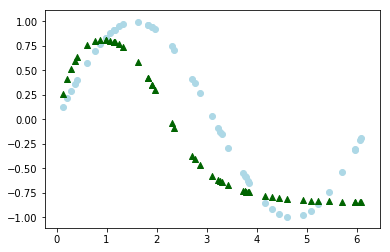

In [17]:
fig =plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X,Y,color='lightblue',marker='o')
ax.scatter(X,  OUTo,
               color='darkgreen',
               marker='^')
plt.show()

Ouah seems much better ! Last point we forgot is to add a bias.

In [18]:
data = randSinVector(n)
X = data[:,0] # will give dimension of (n,), we need (n,1)
# see https://stackoverflow.com/questions/36412762/how-to-understand-empty-dimension-in-python-numpy-array
X = X[np.newaxis].T # X is a (n,1)  
Y = data[:,1]
Y = Y[np.newaxis].T


# add a bias unit to the input layer
X = np.concatenate((np.atleast_2d(np.ones(X.shape[0])).T, X), axis=1)

#layer1_W is the weight vector from input to hidden layer
layer1_W = np.random.random((2,8))  # dim = input , number node
#layer2_W is the weight vector from layer1 to output layer
layer2_W = np.random.random((8,1)) # dim = number node , output

In [19]:
for i in range(1,steps):
    for (Xb, Yb) in next_batch(X, Y):
        OUTh = tanh(np.dot(Xb, layer1_W))  # out of layer1 which is a 50x4 dimension

        OUTo = tanh(np.dot(OUTh, layer2_W))  # prediction of the system (50x1)

        # backprog we will use the Sqare error function = Sigma(y_hat-y)^2

        # for layer2:
        dEtotal_dOUTo = -(Yb-OUTo)  # dimension (50,1)
        dOUTo_dNETo = dtanh(OUTo)#OUTo*(1-OUTo)  # dimension (50,1)
        #OUTh   dimension (50,4)

        dEtotal_dOUTh = np.dot(-(Yb-OUTo)*dtanh(OUTo),layer2_W.T)  # dimension (50,1)
        dOUTh_dNETh = dtanh(OUTh)  # dimension (50,4)
        dNETh_dW = X # dimension (50,1)

        #layer2_W = layer2_W - alpha * (np.dot(dEtotal_dOUTo.T,dOUTo_dNETo*OUTh)).T ##OLD

        layer2_W = layer2_W - alpha * (np.dot((dEtotal_dOUTo*dOUTo_dNETo).T,OUTh)).T

        # for layer1:
        #layer1_W = layer1_W - alpha * (np.dot((dEtotal_dOUTh * dOUTh_dNETh).T, dNETh_dW)).T  ##OLD
        layer1_W = layer1_W - alpha * (Xb.T.dot(dEtotal_dOUTh*dOUTh_dNETh))

        if i % 100 == 0:
            OUTh = tanh(np.dot(X, layer1_W))  # out of layer1 which is a 50x4 dimension
            OUTo = tanh(np.dot(OUTh, layer2_W))

            print("steps:{0} - loss:{1}".format(i, 0.5*(np.sum(Y-OUTo))*(np.sum(Y-OUTo))))
        OUTh = tanh(np.dot(X, layer1_W))  # out of layer1 which is a 50x4 dimension
        OUTo = tanh(np.dot(OUTh, layer2_W))

steps:100 - loss:4.9066584767592625
steps:100 - loss:3.608591795472601
steps:100 - loss:14.333121970502171
steps:100 - loss:0.39562993890635567
steps:100 - loss:0.48799040178311687
steps:200 - loss:4.271209758466033
steps:200 - loss:4.86672801635302
steps:200 - loss:16.033324405871813
steps:200 - loss:2.6520300849762197
steps:200 - loss:0.30410922683334574
steps:300 - loss:4.655282636633231
steps:300 - loss:4.828051107922977
steps:300 - loss:17.365112183349183
steps:300 - loss:3.2715823930235954
steps:300 - loss:0.9439083549612683
steps:400 - loss:3.446330272842241
steps:400 - loss:5.890826340970384
steps:400 - loss:20.487712127936298
steps:400 - loss:5.113260444294991
steps:400 - loss:0.2829678663296968
steps:500 - loss:2.9875331865464947
steps:500 - loss:5.493786235825773
steps:500 - loss:22.257551120302043
steps:500 - loss:4.9985860750737245
steps:500 - loss:0.5593822482068613
steps:600 - loss:14.420027303650244
steps:600 - loss:0.21276637091023018
steps:600 - loss:4.121092506079688

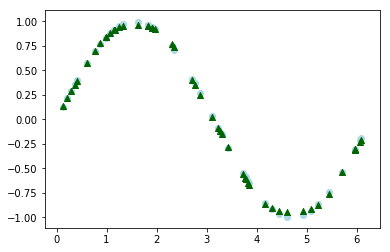

In [20]:
fig =plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[:,1],Y,color='lightblue',marker='o')
ax.scatter(X[:,1],  OUTo,
               color='darkgreen',
               marker='^')
plt.show()

Great !